# Resources
- https://github.com/datamade/census
- https://nicolepaul.io/post/python-census/
- https://api.census.gov/data/2021/acs/acs5/variables.html
- https://pygis.io/docs/d_access_census.html
- https://geopandas.org/en/stable/docs/user_guide/mapping.html

In [1]:
from census import Census
from us import states
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
API_key = np.loadtxt('../data/API.txt',dtype=str).flatten()[0]

In [3]:
c = Census(API_key)

## Pull Census info

**Population:**
- **B01001_001E**	Estimate!!Total:	SEX BY AGE
- **B01001B_001E**	Estimate!!Total:	SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)
- **B01001A_001E**	Estimate!!Total:	SEX BY AGE (WHITE ALONE)
- **B01001H_001E**	Estimate!!Total:	SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)
- **B01001D_001E**	Estimate!!Total:	SEX BY AGE (ASIAN ALONE)

**Income:**
- **B19001H_014E**	Estimate!!Total:!! \$100,000 to \$124,999	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)
- **B19001H_015E**	Estimate!!Total:!! \$125,000 to \$149,999	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)
- **B19001H_016E**	Estimate!!Total:!! \$150,000 to \$199,999	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)
- **B19001H_017E**	Estimate!!Total:!! \$200,000 or more	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)

- **B19001B_002E**	Estimate!!Total:!! Less than \$10,000	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)	
- **B19001B_003E**	Estimate!!Total:!! \$10,000 to \$14,999	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)	
- **B19001B_004E**	Estimate!!Total:!! \$15,000 to \$19,999	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)	
- **B19001B_005E**	Estimate!!Total:!! \$20,000 to \$24,999	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)

- **B19001H_001E**	Estimate!!Total:	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)
- **B19001B_001E**	Estimate!!Total:	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)


**Employment**
- **C23002H_006E**:	Estimate!!Total:!!Male:!!16 to 64 years:!!In labor force:!!Civilian:	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (WHITE ALONE, NOT HISPANIC OR LATINO)
- **C23002H_007E**	Estimate!!Total:!!Male:!!16 to 64 years:!!In labor force:!!Civilian:!!Employed	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (WHITE ALONE, NOT HISPANIC OR LATINO)
- **C23002H_019E**	Estimate!!Total:!!Female:!!16 to 64 years:!!In labor force:!!Civilian:	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (WHITE ALONE, NOT HISPANIC OR LATINO)
- **C23002H_020E**	Estimate!!Total:!!Female:!!16 to 64 years:!!In labor force:!!Civilian:!!Employed	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (WHITE ALONE, NOT HISPANIC OR LATINO)


- **C23002B_006E**	Estimate!!Total:!!Male:!!16 to 64 years:!!In labor force:!!Civilian:	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (BLACK OR AFRICAN AMERICAN ALONE)	
- **C23002B_007E**	Estimate!!Total:!!Male:!!16 to 64 years:!!In labor force:!!Civilian:!!Employed	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (BLACK OR AFRICAN AMERICAN ALONE)	
- **C23002B_019E**	Estimate!!Total:!!Female:!!16 to 64 years:!!In labor force:!!Civilian:	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (BLACK OR AFRICAN AMERICAN ALONE)	
- **C23002B_020E**	Estimate!!Total:!!Female:!!16 to 64 years:!!In labor force:!!Civilian:!!Employed	SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (BLACK OR AFRICAN AMERICAN ALONE)	

**Education**
- **C15002H_001E**	Estimate!!Total:	SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER (WHITE ALONE, NOT HISPANIC OR LATINO)
- **C15002H_006E**	Estimate!!Total:!!Male:!!Bachelor's degree or higher SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER (WHITE ALONE, NOT HISPANIC OR LATINO)
- **C15002H_011E**	Estimate!!Total:!!Female:!!Bachelor's degree or higher	SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER (WHITE ALONE)
- **C15002B_001E**	Estimate!!Total:	SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER (BLACK OR AFRICAN AMERICAN)
- **C15002B_006E**	Estimate!!Total:!!Male:!!Bachelor's degree or higher	SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER (BLACK OR AFRICAN AMERICAN ALONE)
- **C15002B_011E**	Estimate!!Total:!!Female:!!Bachelor's degree or higher	SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER (BLACK OR AFRICAN AMERICAN ALONE)

**Homeownership**
- **B25003H_001E**	Estimate!!Total:	TENURE (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)
- **B25003H_002E**	Estimate!!Total:!!Owner occupied	TENURE (WHITE ALONE HOUSEHOLDER)	
- **B25003B_001E**	Estimate!!Total:	TENURE (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)	
- **B25003B_002E**	Estimate!!Total:!!Owner occupied	TENURE (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)

In [4]:
nc_census = c.acs5.state_county_tract(fields = ('NAME', 'B01001_001E', 'B01001B_001E', 'B01001H_001E', # population
                                               'B19001H_001E','B19001H_014E', 'B19001H_015E', 'B19001H_016E', 'B19001H_017E', # white income
                                                'B19001B_001E','B19001B_002E', 'B19001B_003E', 'B19001B_004E', 'B19001B_005E', # black income
                                               'C23002H_006E', 'C23002H_007E', 
                                               'C23002H_019E', 'C23002H_020E', 
                                               'C23002B_006E', 'C23002B_007E',
                                               'C23002B_019E', 'C23002B_020E', 
                                               'C15002H_001E', 'C15002H_006E', 'C15002H_011E',
                                               'C15002B_001E', 'C15002B_006E', 'C15002B_011E',
                                               'B25003H_001E', 'B25003H_002E', 
                                               'B25003B_001E', 'B25003B_002E'),
                                      state_fips = states.NC.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2021)
nc_df = pd.DataFrame(nc_census)

nc_df["GEOID"] = nc_df["state"] + nc_df["county"] + nc_df["tract"]

nc_df = nc_df.rename({"B01001_001E": "total_pop", "B01001B_001E" : "black_pop", "B01001H_001E": "white_pop"}, axis=1)

print(nc_df.shape)
nc_df.head(2)


(2672, 36)


,NAME,total_pop,black_pop,white_pop,B19001H_001E,B19001H_014E,B19001H_015E,B19001H_016E,B19001H_017E,B19001B_001E,...,C15002B_006E,C15002B_011E,B25003H_001E,B25003H_002E,B25003B_001E,B25003B_002E,state,county,tract,GEOID
0,"Census Tract 201, Alamance County, North Carolina",4224.0,1051.0,2835.0,1381.0,128.0,75.0,93.0,122.0,424.0,...,23.0,66.0,1381.0,710.0,424.0,87.0,37,001,020100,37001020100
1,"Census Tract 202, Alamance County, North Carolina",4208.0,1321.0,1205.0,537.0,0.0,9.0,14.0,7.0,563.0,...,6.0,0.0,537.0,330.0,563.0,112.0,37,001,020200,37001020200


### Index of dissimiliarity 

In [5]:
nc_df[['county_total_pop','county_black_pop','county_white_pop']] = nc_df.groupby("county")[["total_pop", "black_pop", "white_pop"]].transform(np.sum)

nc_df["D"] = np.abs(nc_df['white_pop']/nc_df['county_white_pop'] - nc_df['black_pop']/nc_df['county_black_pop'])
nc_df["D2"] = np.square(nc_df['white_pop']/nc_df['county_white_pop'] - nc_df['black_pop']/nc_df['county_black_pop'])

nc_df.head(1)

/var/folders/yg/23gp3k513f198d0sqw9ysb100000gq/T/ipykernel_17793/768305816.py:1: FutureWarning: The provided callable <function sum at 0x1184b7d00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  nc_df[['county_total_pop','county_black_pop','county_white_pop']] = nc_df.groupby("county")[["total_pop", "black_pop", "white_pop"]].transform(np.sum)


,NAME,total_pop,black_pop,white_pop,B19001H_001E,B19001H_014E,B19001H_015E,B19001H_016E,B19001H_017E,B19001B_001E,...,B25003B_002E,state,county,tract,GEOID,county_total_pop,county_black_pop,county_white_pop,D,D2
0,"Census Tract 201, Alamance County, North Carolina",4224.0,1051.0,2835.0,1381.0,128.0,75.0,93.0,122.0,424.0,...,87.0,37,001,020100,37001020100,169185.0,33392.0,105121.0,0.004506,0.00002


### Income inequality measured by index of concentration at the extremes (ICE)

In [6]:
white_over_100k = ["B19001H_014E", "B19001H_015E", "B19001H_016E", "B19001H_017E"]
black_under_25k = ["B19001B_002E", "B19001B_003E", "B19001B_004E", "B19001B_005E"]
households = ["B19001H_001E", "B19001B_001E"]

nc_df["white_100k"] = nc_df[white_over_100k].sum(axis=1)
nc_df["black_25k"] = nc_df[black_under_25k].sum(axis=1)

nc_df["bw_households"] = nc_df[households].sum(axis=1)

nc_df = nc_df.drop(white_over_100k+ black_under_25k+households, axis=1)
print(nc_df.shape)

nc_df.head(2)

(2672, 34)


,NAME,total_pop,black_pop,white_pop,C23002H_006E,C23002H_007E,C23002H_019E,C23002H_020E,C23002B_006E,C23002B_007E,...,tract,GEOID,county_total_pop,county_black_pop,county_white_pop,D,D2,white_100k,black_25k,bw_households
0,"Census Tract 201, Alamance County, North Carolina",4224.0,1051.0,2835.0,817.0,799.0,705.0,688.0,125.0,83.0,...,020100,37001020100,169185.0,33392.0,105121.0,0.004506,0.000020,418.0,337.0,1805.0
1,"Census Tract 202, Alamance County, North Carolina",4208.0,1321.0,1205.0,145.0,132.0,265.0,241.0,190.0,157.0,...,020200,37001020200,169185.0,33392.0,105121.0,0.028097,0.000789,30.0,285.0,1100.0


### Employment gap

In [7]:
white_labor_force = ["C23002H_006E", "C23002H_019E"]
black_labor_force = ["C23002B_006E", "C23002B_019E"]

white_employed = ["C23002H_007E", "C23002H_020E"]
black_employed = ["C23002B_007E", "C23002B_020E"]

nc_df["white_labor"] = nc_df[white_labor_force].sum(axis=1)
nc_df["black_labor"] = nc_df[black_labor_force].sum(axis=1)

nc_df["white_employed"] = nc_df[white_employed].sum(axis=1)
nc_df["black_employed"] = nc_df[black_employed].sum(axis=1)

nc_df = nc_df.drop(white_labor_force+ black_labor_force+white_employed+black_employed, axis=1)
print(nc_df.shape)

nc_df.head(2)

(2672, 30)


,NAME,total_pop,black_pop,white_pop,C15002H_001E,C15002H_006E,C15002H_011E,C15002B_001E,C15002B_006E,C15002B_011E,...,county_white_pop,D,D2,white_100k,black_25k,bw_households,white_labor,black_labor,white_employed,black_employed
0,"Census Tract 201, Alamance County, North Carolina",4224.0,1051.0,2835.0,2217.0,515.0,488.0,634.0,23.0,66.0,...,105121.0,0.004506,0.000020,418.0,337.0,1805.0,1522.0,388.0,1487.0,267.0
1,"Census Tract 202, Alamance County, North Carolina",4208.0,1321.0,1205.0,905.0,27.0,159.0,948.0,6.0,0.0,...,105121.0,0.028097,0.000789,30.0,285.0,1100.0,410.0,595.0,373.0,544.0


### Education gap

In [8]:
white_bachelors = ["C15002H_006E", "C15002H_011E"]
black_bachelors = ["C15002B_006E", "C15002B_011E"]

nc_df["white_bachelors"] = nc_df[white_bachelors].sum(axis=1)
nc_df["black_bachelors"] = nc_df[black_bachelors].sum(axis=1)

nc_df = nc_df.drop(white_bachelors+ black_bachelors, axis=1)

nc_df = nc_df.rename({'C15002H_001E': 'white_25', 'C15002B_001E': 'black_25'}, axis=1)
print(nc_df.shape)

nc_df.head(2)

(2672, 28)


,NAME,total_pop,black_pop,white_pop,white_25,black_25,B25003H_001E,B25003H_002E,B25003B_001E,B25003B_002E,...,D2,white_100k,black_25k,bw_households,white_labor,black_labor,white_employed,black_employed,white_bachelors,black_bachelors
0,"Census Tract 201, Alamance County, North Carolina",4224.0,1051.0,2835.0,2217.0,634.0,1381.0,710.0,424.0,87.0,...,0.000020,418.0,337.0,1805.0,1522.0,388.0,1487.0,267.0,1003.0,89.0
1,"Census Tract 202, Alamance County, North Carolina",4208.0,1321.0,1205.0,905.0,948.0,537.0,330.0,563.0,112.0,...,0.000789,30.0,285.0,1100.0,410.0,595.0,373.0,544.0,186.0,6.0


### Owns the house they live in

In [9]:
nc_df = nc_df.rename({'B25003H_001E': 'white_households', 'B25003H_002E': 'white_homeowners',
                     'B25003B_001E': 'black_households', 'B25003B_002E': 'black_homeowners'}, axis=1)
print(nc_df.shape)

nc_df.head(2)

(2672, 28)


,NAME,total_pop,black_pop,white_pop,white_25,black_25,white_households,white_homeowners,black_households,black_homeowners,...,D2,white_100k,black_25k,bw_households,white_labor,black_labor,white_employed,black_employed,white_bachelors,black_bachelors
0,"Census Tract 201, Alamance County, North Carolina",4224.0,1051.0,2835.0,2217.0,634.0,1381.0,710.0,424.0,87.0,...,0.000020,418.0,337.0,1805.0,1522.0,388.0,1487.0,267.0,1003.0,89.0
1,"Census Tract 202, Alamance County, North Carolina",4208.0,1321.0,1205.0,905.0,948.0,537.0,330.0,563.0,112.0,...,0.000789,30.0,285.0,1100.0,410.0,595.0,373.0,544.0,186.0,6.0


In [10]:
# nc_puma_eq = pd.read_table('https://www2.census.gov/geo/docs/reference/puma/PUMSEQ10_37.txt', header=None)

# def parse_puma_code(x):
#     # https://www2.census.gov/geo/pdfs/reference/puma/2010_PUMA_Equivalency_Format_Layout.pdf
#     return pd.Series([x[:3], x[3:5], x[5:13], x[13:18], x[18:21], x[21:29], x[29:34], x[34:42], x[42:47], x[47:55], x[55:61], x[61:70], x[70:79], x[79:]])

# nc_puma_eq[['SL', 'STATEFP','STATENS','PUMACE', 'COUNTYFP', 'COUNTYNS','COUSUBFP','COUSUBNS','PLACEFP','PLACENS','TRACTCE','POP10','HU10','NAME']]=nc_puma_eq[0].apply(parse_puma_code)

# print(nc_puma_eq.shape, len(pd.unique(nc_puma_eq["PUMACE"])))
# print(len(pd.unique(nc_puma_eq["TRACTCE"])))
# nc_puma_eq.head()

In [11]:
# df = nc_df.merge(nc_puma_eq[['PUMACE', 'TRACTCE']], how='left', left_on='tract', right_on='TRACTCE')
# df.shape

## Connect census data with geo info

### PUMA
- https://usa.ipums.org/usa/volii/boundaries.shtml
- https://usa.ipums.org/usa-action/variables/PUMA#description_section
- https://usa.ipums.org/usa/volii/pumas10.shtml
- https://www.shadac.org/public-use-microdata-area-2020-updates-acs-2022

In [12]:
# NC Census tract Shapefiles
nc_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_37_tract.zip")
# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
nc_tract = nc_tract.to_crs(epsg = 4326)
print(nc_tract.shape)

(2672, 13)


In [13]:
nc_tract = nc_tract.drop(['STATEFP', 'NAME','NAMELSAD','MTFCC','FUNCSTAT','ALAND','AWATER','INTPTLAT','INTPTLON'], axis=1)
nc_tract.head(2)

,COUNTYFP,TRACTCE,GEOID,geometry
0,009,970801,37009970801,"POLYGON ((-81.43437 36.36623, -81.43435 36.366..."
1,009,970802,37009970802,"POLYGON ((-81.49680 36.57366, -81.49674 36.573..."


In [14]:
nc_df = nc_df.drop(['state','county','tract'],axis=1)
nc_merge = nc_tract.merge(nc_df, on = "GEOID")
print(nc_merge.shape)
nc_merge.head(2)

(2672, 28)


,COUNTYFP,TRACTCE,GEOID,geometry,NAME,total_pop,black_pop,white_pop,white_25,black_25,...,D2,white_100k,black_25k,bw_households,white_labor,black_labor,white_employed,black_employed,white_bachelors,black_bachelors
0,009,970801,37009970801,"POLYGON ((-81.43437 36.36623, -81.43435 36.366...","Census Tract 9708.01, Ashe County, North Carolina",2098.0,0.0,1940.0,1454.0,0.0,...,0.006278,202.0,0.0,936.0,1143.0,0.0,1109.0,0.0,207.0,0.0
1,009,970802,37009970802,"POLYGON ((-81.49680 36.57366, -81.49674 36.573...","Census Tract 9708.02, Ashe County, North Carolina",3370.0,3.0,3213.0,2226.0,3.0,...,0.014238,187.0,0.0,1360.0,1377.0,0.0,1337.0,0.0,398.0,0.0


In [15]:
# # NC PUMA Shapefiles
# nc_puma = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2021/PUMA/tl_2021_37_puma10.zip")
# nc_puma = nc_puma.to_crs(epsg = 4326)
# print(nc_puma.shape)

In [16]:
# nc_puma.head()

## Add by county

In [17]:
nc_merge = nc_merge.drop(['GEOID', 'TRACTCE'],axis=1)

nc_merge_county = nc_merge.dissolve(by = 'COUNTYFP', aggfunc = 'sum')
nc_merge_county = nc_merge_county.reset_index()
nc_merge_county["NAME"] = nc_merge_county["NAME"].str.split("County").str.get(0).str.split(" ").str.get(-2)
print(nc_merge_county.shape)

(100, 26)


# Calculate metrics by county

In [18]:
nc_merge_county["county_black_proportion"] = 100*(nc_merge_county["black_pop"]/nc_merge_county["total_pop"])

nc_merge_county["ICE"] = (nc_merge_county["white_100k"]-nc_merge_county["black_25k"])/nc_merge_county["bw_households"]

nc_merge_county["D"] = nc_merge_county["D"]/2
nc_merge_county["D2"] = nc_merge_county["D2"]/2

nc_merge_county["black_employment_rate"] = nc_merge_county["black_employed"]/nc_merge_county["black_labor"]
nc_merge_county["white_employment_rate"] = nc_merge_county["white_employed"]/nc_merge_county["white_labor"]

nc_merge_county["employment"] = nc_merge_county["white_employment_rate"] - nc_merge_county["black_employment_rate"]

nc_merge_county["black_edu_rate"] = nc_merge_county["black_bachelors"]/nc_merge_county["black_25"]
nc_merge_county["white_edu_rate"] = nc_merge_county["white_bachelors"]/nc_merge_county["white_25"]

nc_merge_county["education"] = nc_merge_county["white_edu_rate"] - nc_merge_county["black_edu_rate"]

nc_merge_county["black_homeown_rate"] = nc_merge_county["black_homeowners"]/nc_merge_county["black_households"]
nc_merge_county["white_homeown_rate"] = nc_merge_county["white_homeowners"]/nc_merge_county["white_households"]

nc_merge_county["homeownership"] = nc_merge_county["white_homeown_rate"] - nc_merge_county["black_homeown_rate"]



In [19]:
nc_merge_county.head(2)

,COUNTYFP,geometry,NAME,total_pop,black_pop,white_pop,white_25,black_25,white_households,white_homeowners,...,ICE,black_employment_rate,white_employment_rate,employment,black_edu_rate,white_edu_rate,education,black_homeown_rate,white_homeown_rate,homeownership
0,001,"POLYGON ((-79.54237 35.84559, -79.54237 35.845...",Alamance,169185.0,33392.0,105121.0,75874.0,22791.0,44194.0,32748.0,...,0.124531,0.920463,0.957821,0.037358,0.173577,0.306165,0.132588,0.467426,0.741006,0.273580
1,003,"POLYGON ((-81.34392 35.82527, -81.34386 35.825...",Alexander,36491.0,1845.0,31505.0,23471.0,1371.0,12481.0,10265.0,...,0.227297,0.956947,0.945908,-0.011039,0.000000,0.157386,0.157386,0.759174,0.822450,0.063276


## Plot maps

## Coordinates

In [20]:
gdf = pd.DataFrame(
    {
        "City": ["Charlotte", "Raleigh", "Asheville", "Wilmington", "Greensboro", "Nags Head", "Fayetteville"],
        "Latitude": [35.227085, 35.787743, 35.596588,  34.225727, 36.044659, 35.932004, 35.052666],
        "Longitude": [-80.843124, -78.644257, -82.554901, -77.944710, -79.766235, -75.615085, -78.878357],
    }
)

gdf = gpd.GeoDataFrame(
    gdf, geometry=gpd.points_from_xy(gdf.Longitude, gdf.Latitude), crs="epsg:4326"
)


In [21]:
import re

plantation_df = pd.read_csv('../data/Plantations - NC.csv', usecols=[0,1,3,4,5])

def degrees2decimal(x):
    degrees = re.split("[^0-9]", str(x))[:3]
    try:
        decimal = int(degrees[0])+int(degrees[1])/60+int(degrees[2])/3600
    except ValueError:
        decimal = pd.NA
    if str(x)[-1] == "W":
        return -1*decimal
    return decimal
    

plantation_df['Latitude'] = plantation_df['Coordinates'].str.split(' ').str.get(0).apply(degrees2decimal)
plantation_df['Longitude'] = plantation_df['Coordinates'].str.split(' ').str.get(1).apply(degrees2decimal)

plantation_df = plantation_df[~plantation_df["Longitude"].isna()]


plantation_df = gpd.GeoDataFrame(
    plantation_df, geometry=gpd.points_from_xy(plantation_df.Longitude, plantation_df.Latitude), crs="epsg:4326"
)


In [22]:
plantation_counts = plantation_df["County"].value_counts().reset_index()

In [23]:
nc_merge_county = nc_merge_county.merge(plantation_counts, how="left", left_on="NAME", right_on="County")
nc_merge_county.loc[nc_merge_county["count"].isna(), "count"] = 0
nc_merge_county = nc_merge_county.rename({"count": "plantation"}, axis=1)

In [24]:
# fig, ax = plt.subplots(1, 1, figsize = (20, 10))
# nc_merge_county.plot(column = "B01001_001E",
#                        ax = ax,
#                        cmap = "RdPu",
#                        legend = True)

# gdf.plot(ax=ax, marker='*', color='black', markersize=100)
# gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)

# # Stylize plots
# plt.style.use('bmh')
# plt.tight_layout()
# plt.title('Total Population (County)', fontsize=24)

Text(0.5, 1.0, 'Number of plantations')

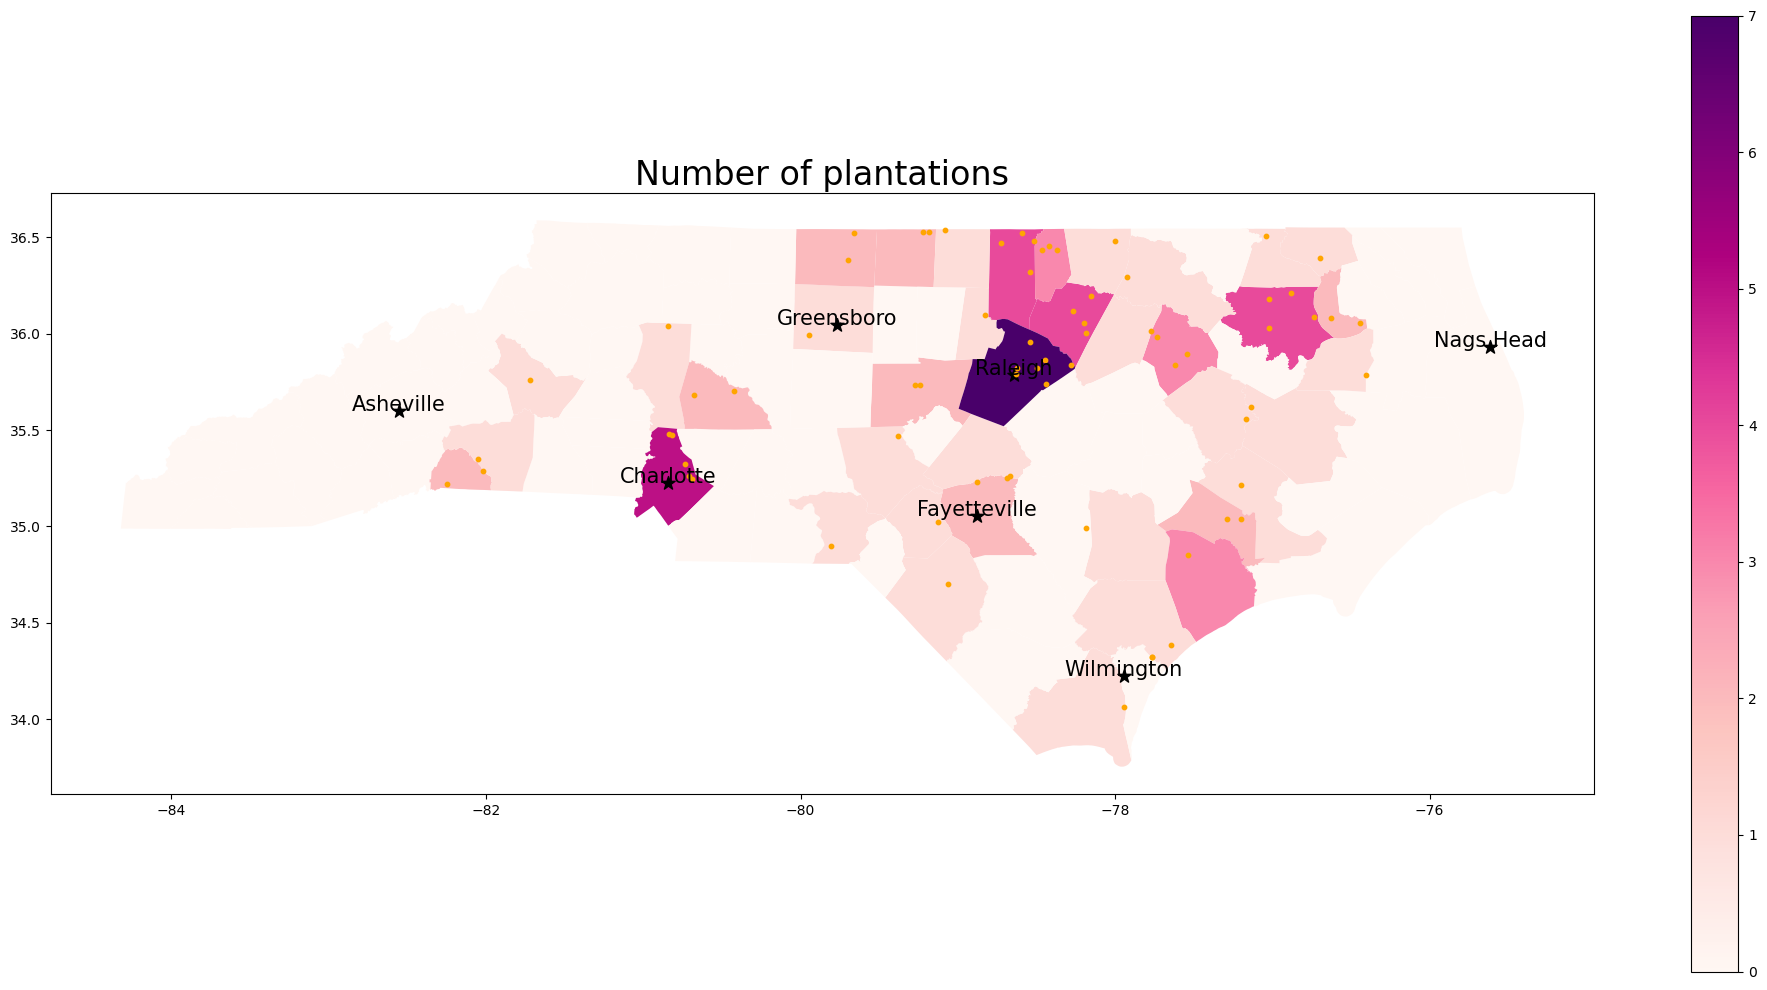

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "plantation",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)

plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)


# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('Number of plantations', fontsize=24)

Text(0.5, 1.0, 'Index of Concentration at the Extremes (by County)')

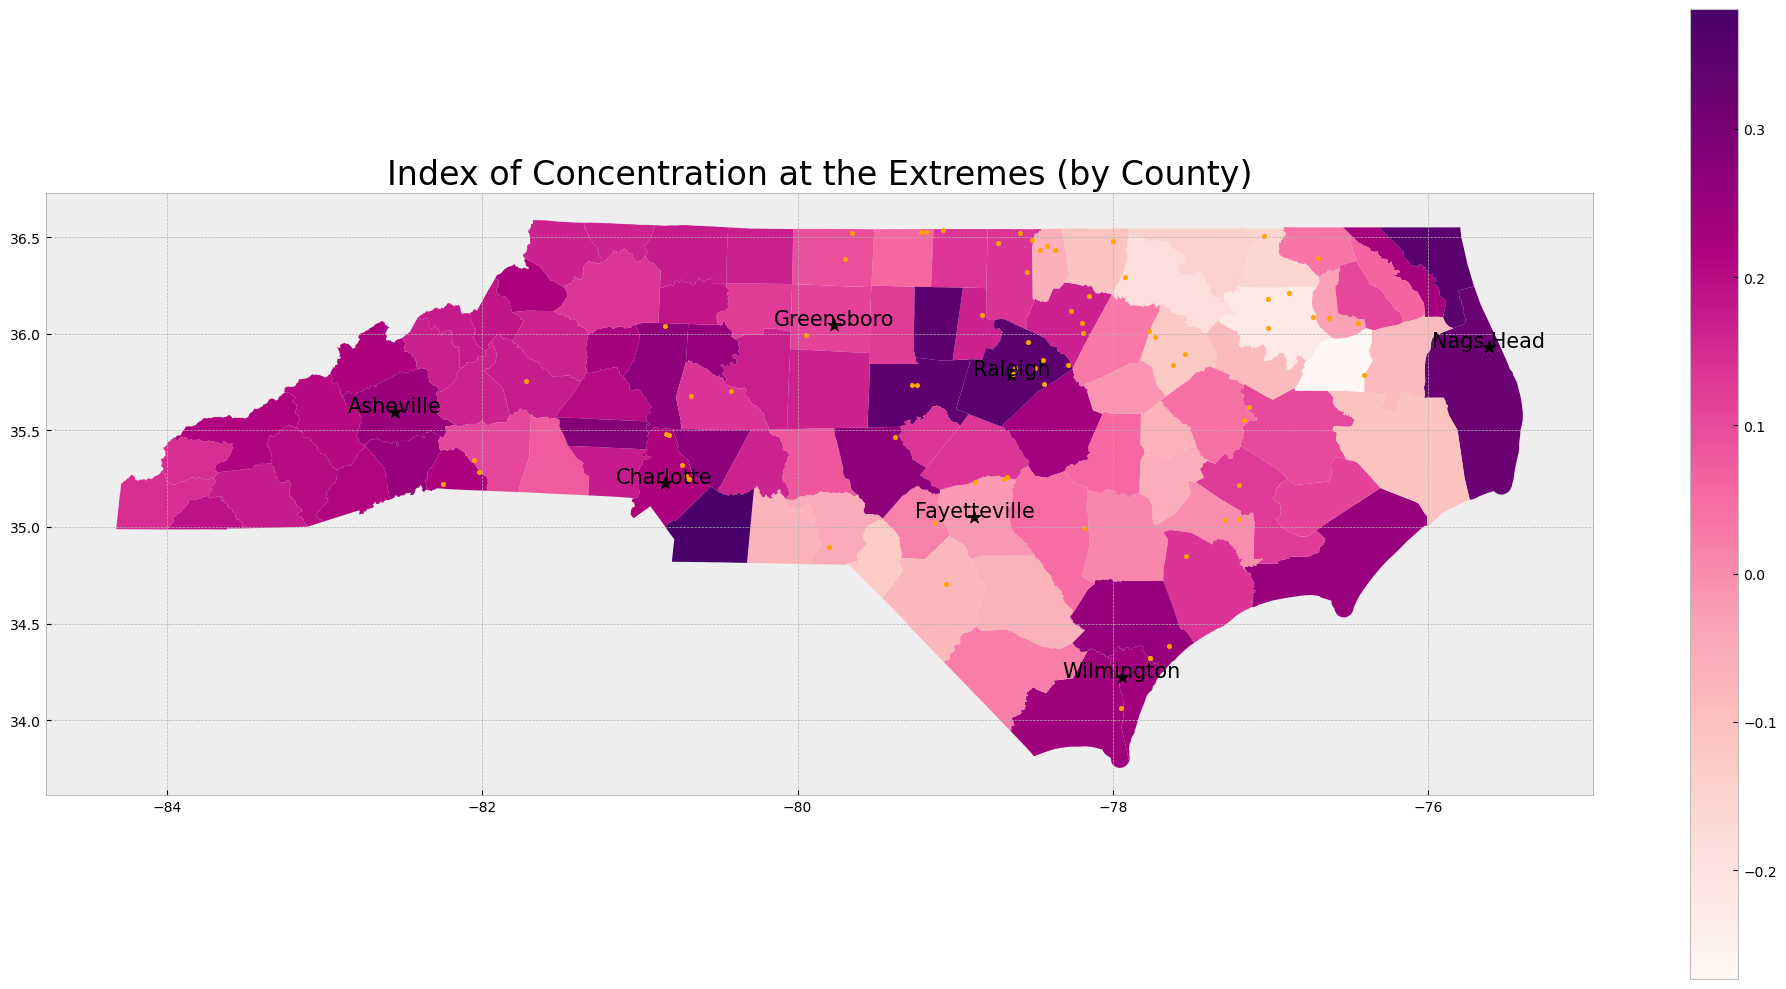

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "ICE",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)

plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)


# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('Index of Concentration at the Extremes (by County)', fontsize=24)

Text(0.5, 1.0, 'Index of Dissimilarity (by County)')

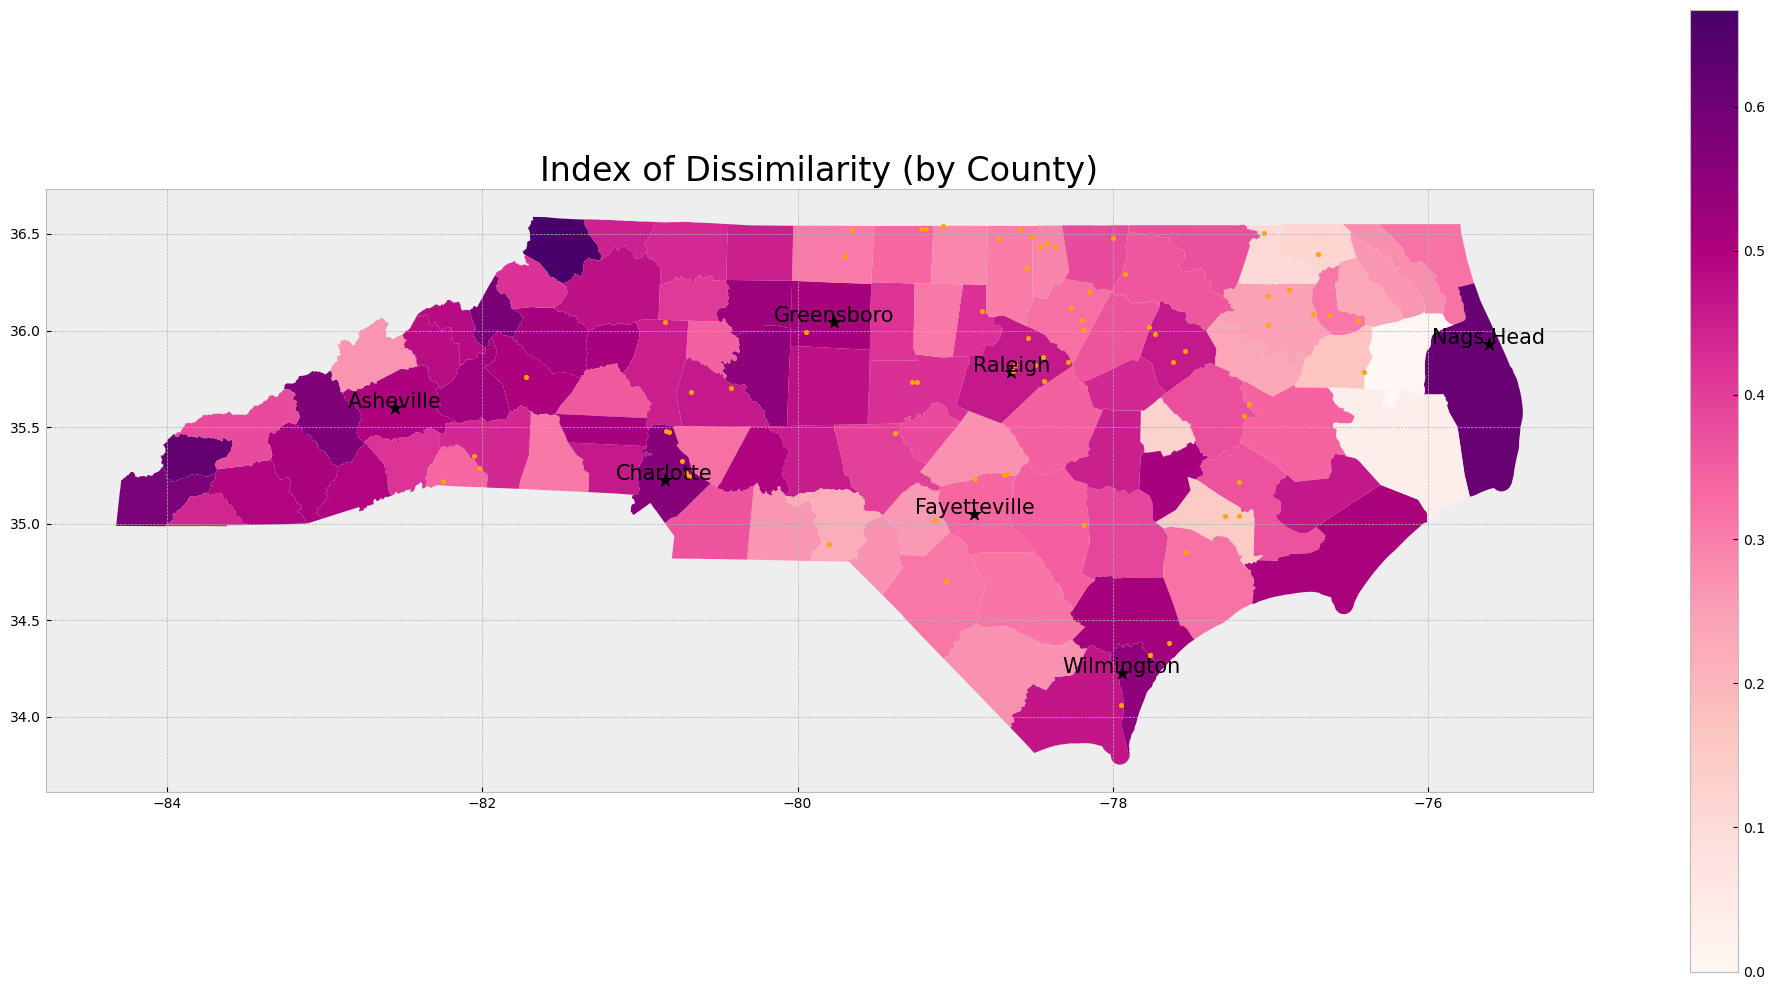

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "D",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('Index of Dissimilarity (by County)', fontsize=24)

Text(0.5, 1.0, 'White employment rate - Black employment rate (by County)')

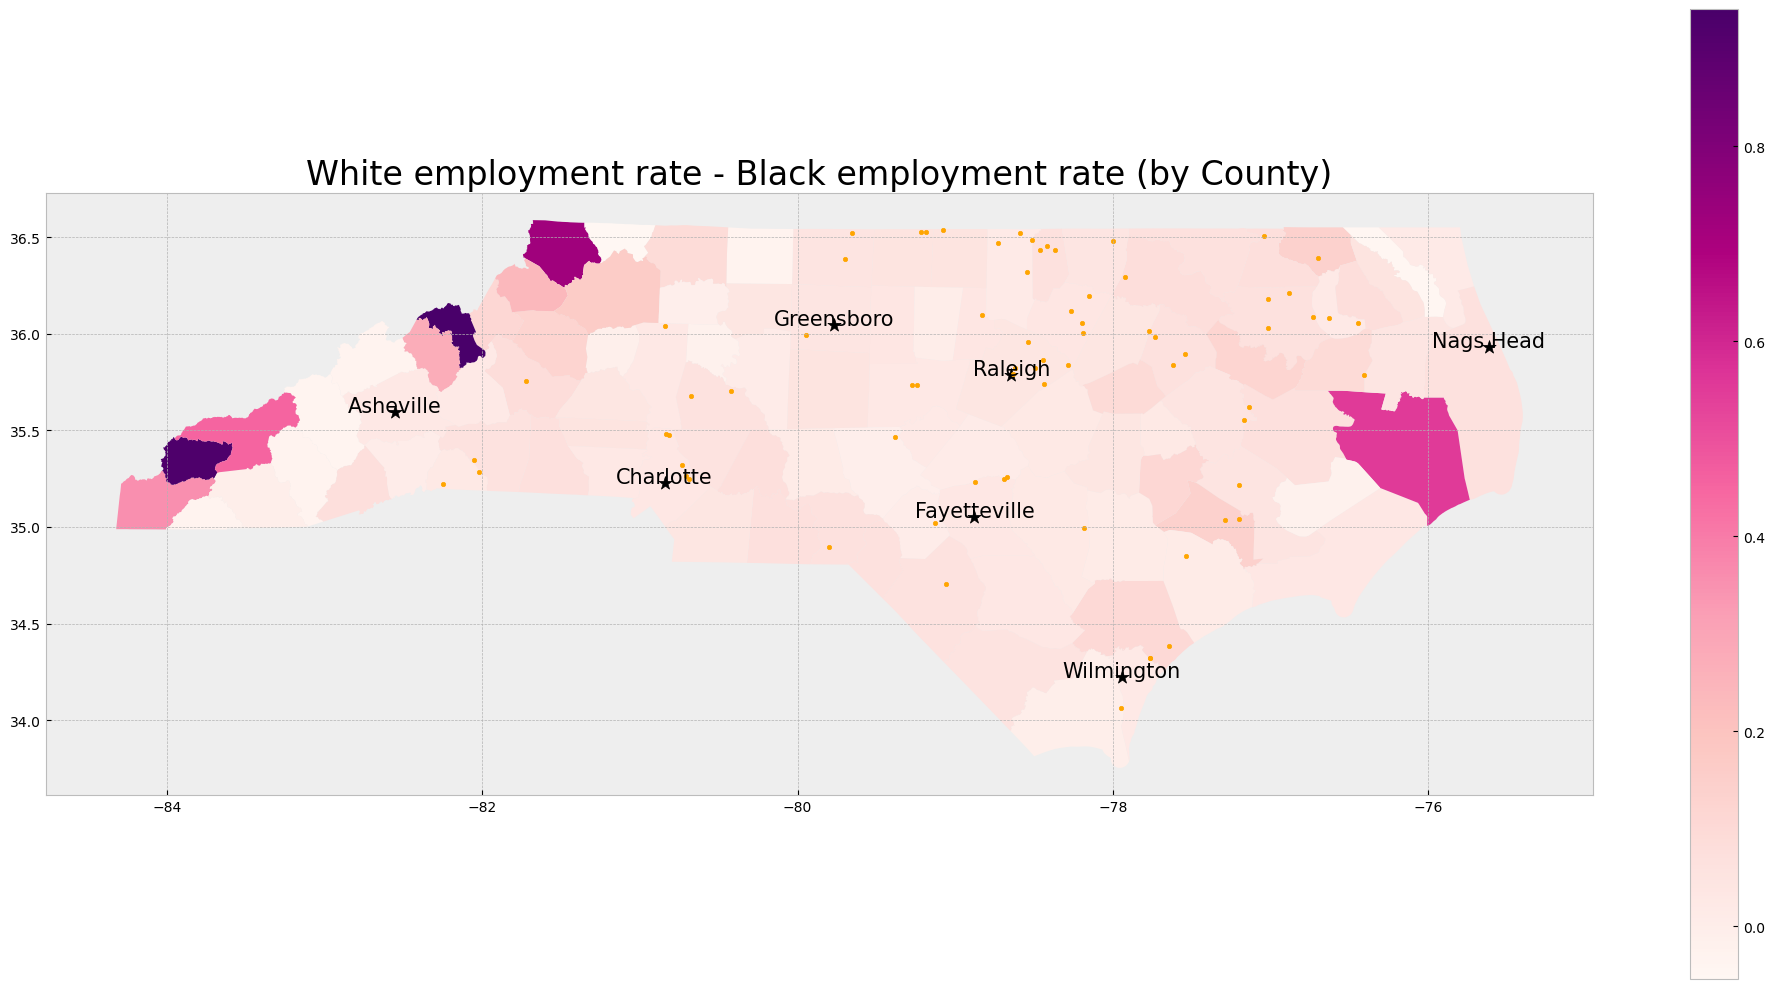

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "employment",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('White employment rate - Black employment rate (by County)', fontsize=24)

Text(0.5, 1.0, "White Bachelor's rate - Black Bachelor's rate (by County)")

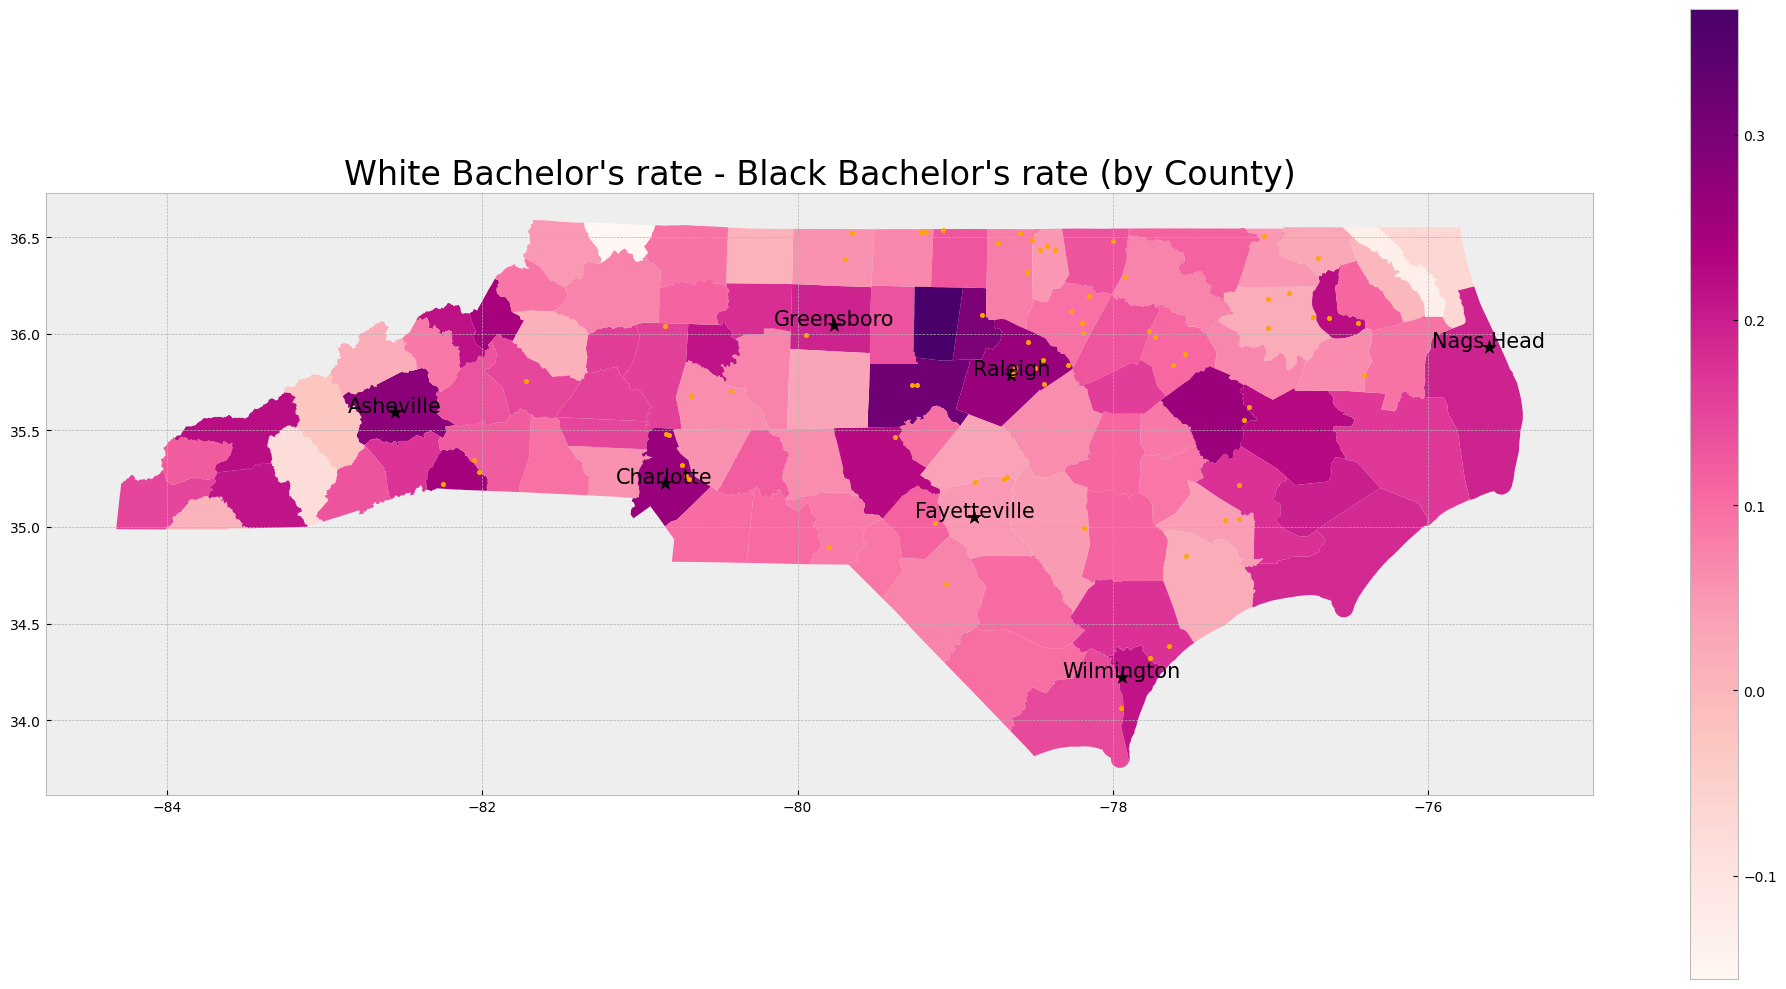

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "education",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title("White Bachelor's rate - Black Bachelor's rate (by County)", fontsize=24)

Text(0.5, 1.0, 'White homeownership rate - Black homeownership rate (by County)')

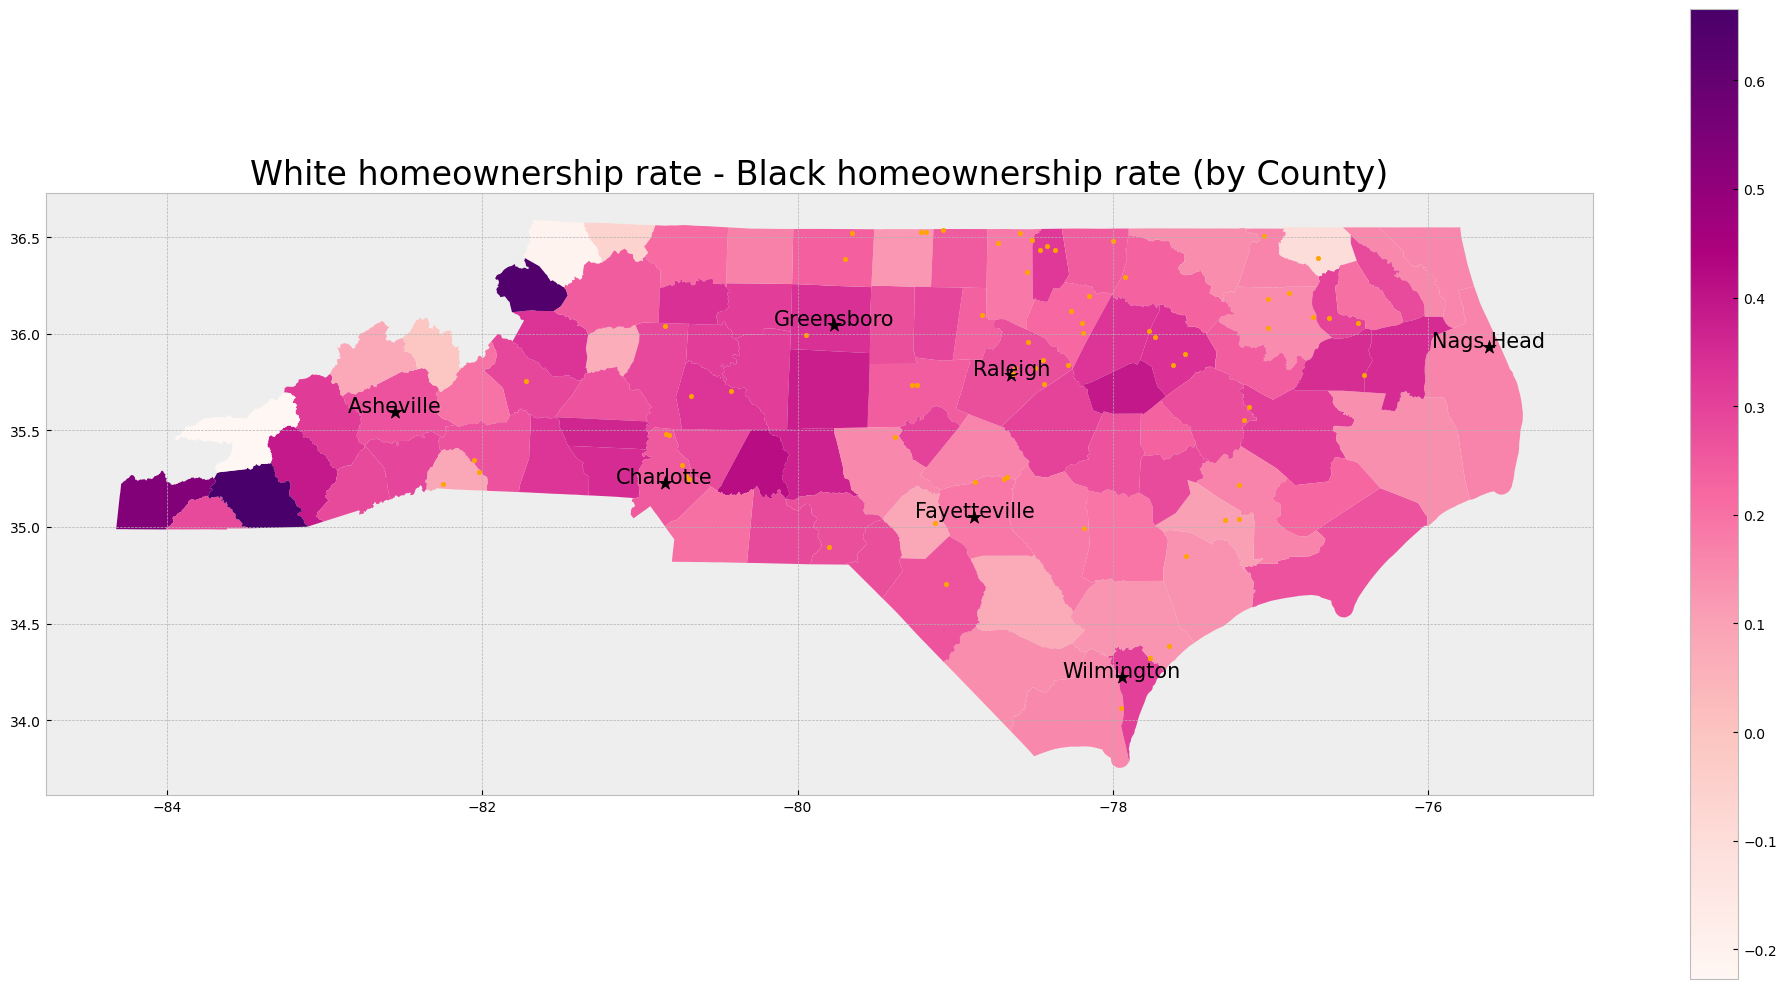

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "homeownership",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title("White homeownership rate - Black homeownership rate (by County)", fontsize=24)

# Clustering

In [31]:
data = nc_merge_county[["ICE", "D", "employment", "education", "homeownership"]]

Fitting StepMix...


Initializations (n_init) : 100%|█| 1/1 [00:00<00:00, 92.07it/s, max_LL=443, max_


(array([89, 11]), array([0, 1, 2]))
Fitting StepMix...


Initializations (n_init) : 100%|█| 1/1 [00:00<00:00, 53.88it/s, max_LL=485, max_


(array([27, 63, 10]), array([0, 1, 2, 3]))
Fitting StepMix...


Initializations (n_init) : 100%|█| 1/1 [00:00<00:00, 20.55it/s, max_LL=503, max_


(array([49, 18,  7, 26]), array([0, 1, 2, 3, 4]))
Fitting StepMix...


Initializations (n_init) : 100%|█| 1/1 [00:00<00:00, 51.18it/s, max_LL=526, max_

(array([ 9, 40,  9, 24, 18]), array([0, 1, 2, 3, 4, 5]))


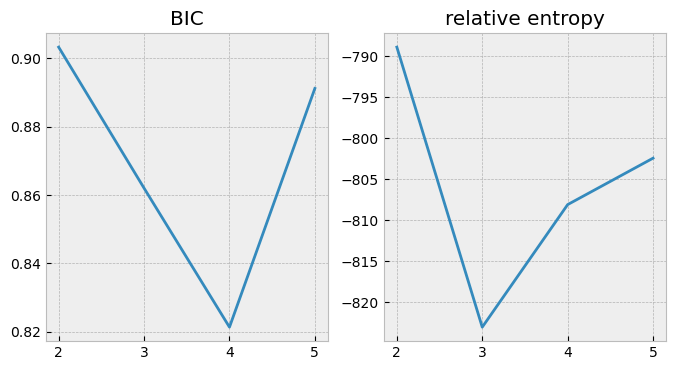

In [32]:
from stepmix.stepmix import StepMix

scores = []
n_classes = range(2, 6)
# Allow missing values
for k in n_classes:
    model_nan = StepMix(n_components=k, measurement="continuous_nan", verbose=0)
    model_nan.fit(data)
    LCA = model_nan.predict_class(data)
    print(np.histogram(LCA, range(k+1)))
    
    scores.append([model_nan.bic(data), model_nan.relative_entropy(data)])

scores = np.array(scores)
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
ax[0].plot(n_classes, scores[:, 1])
ax[0].set_title('BIC')
ax[1].plot(n_classes, scores[:, 0])
ax[1].set_title('relative entropy')
plt.show()

In [33]:
model_nan = StepMix(n_components=3, measurement="continuous_nan", verbose=2)
model_nan.fit(data)
nc_merge_county["LCA"] = model_nan.predict_class(data)

Fitting StepMix...


Initializations (n_init) : 100%|█| 1/1 [00:00<00:00, 60.10it/s, max_LL=486, max_


Text(0.5, 1.0, 'LCA class')

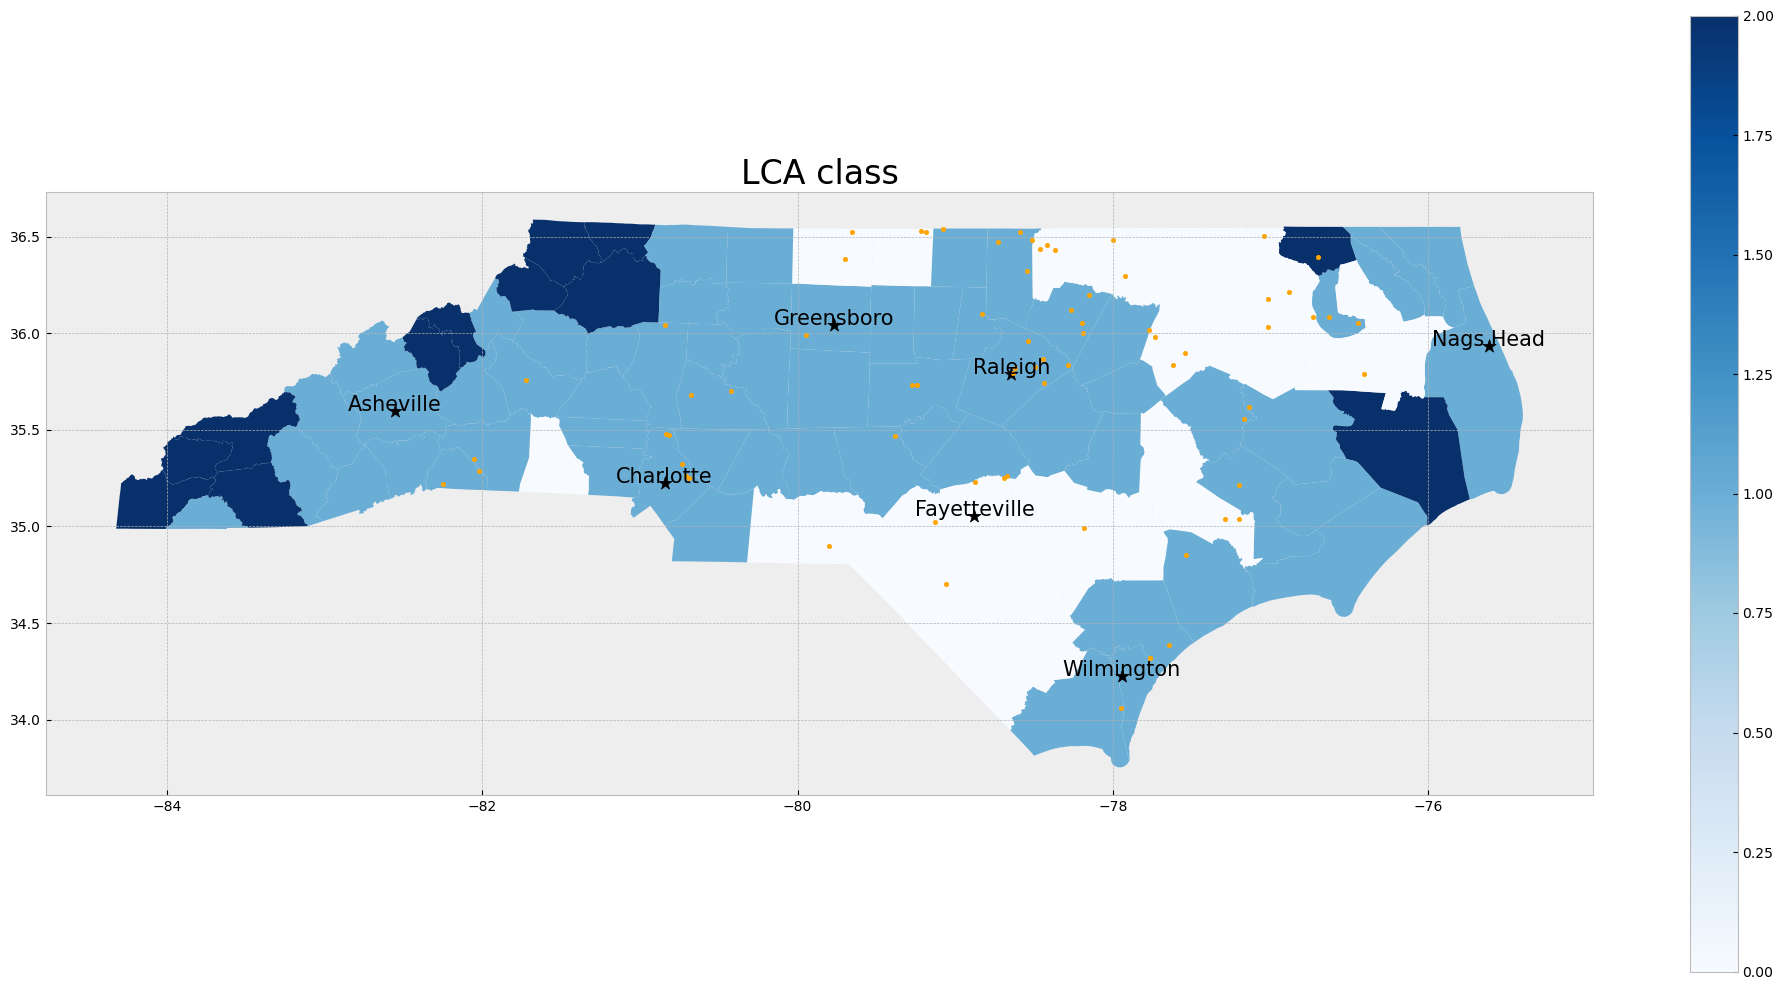

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "LCA",
                       ax = ax,
                       cmap = "Blues",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title("LCA class", fontsize=24)

Text(0.5, 1.0, 'Total Population')

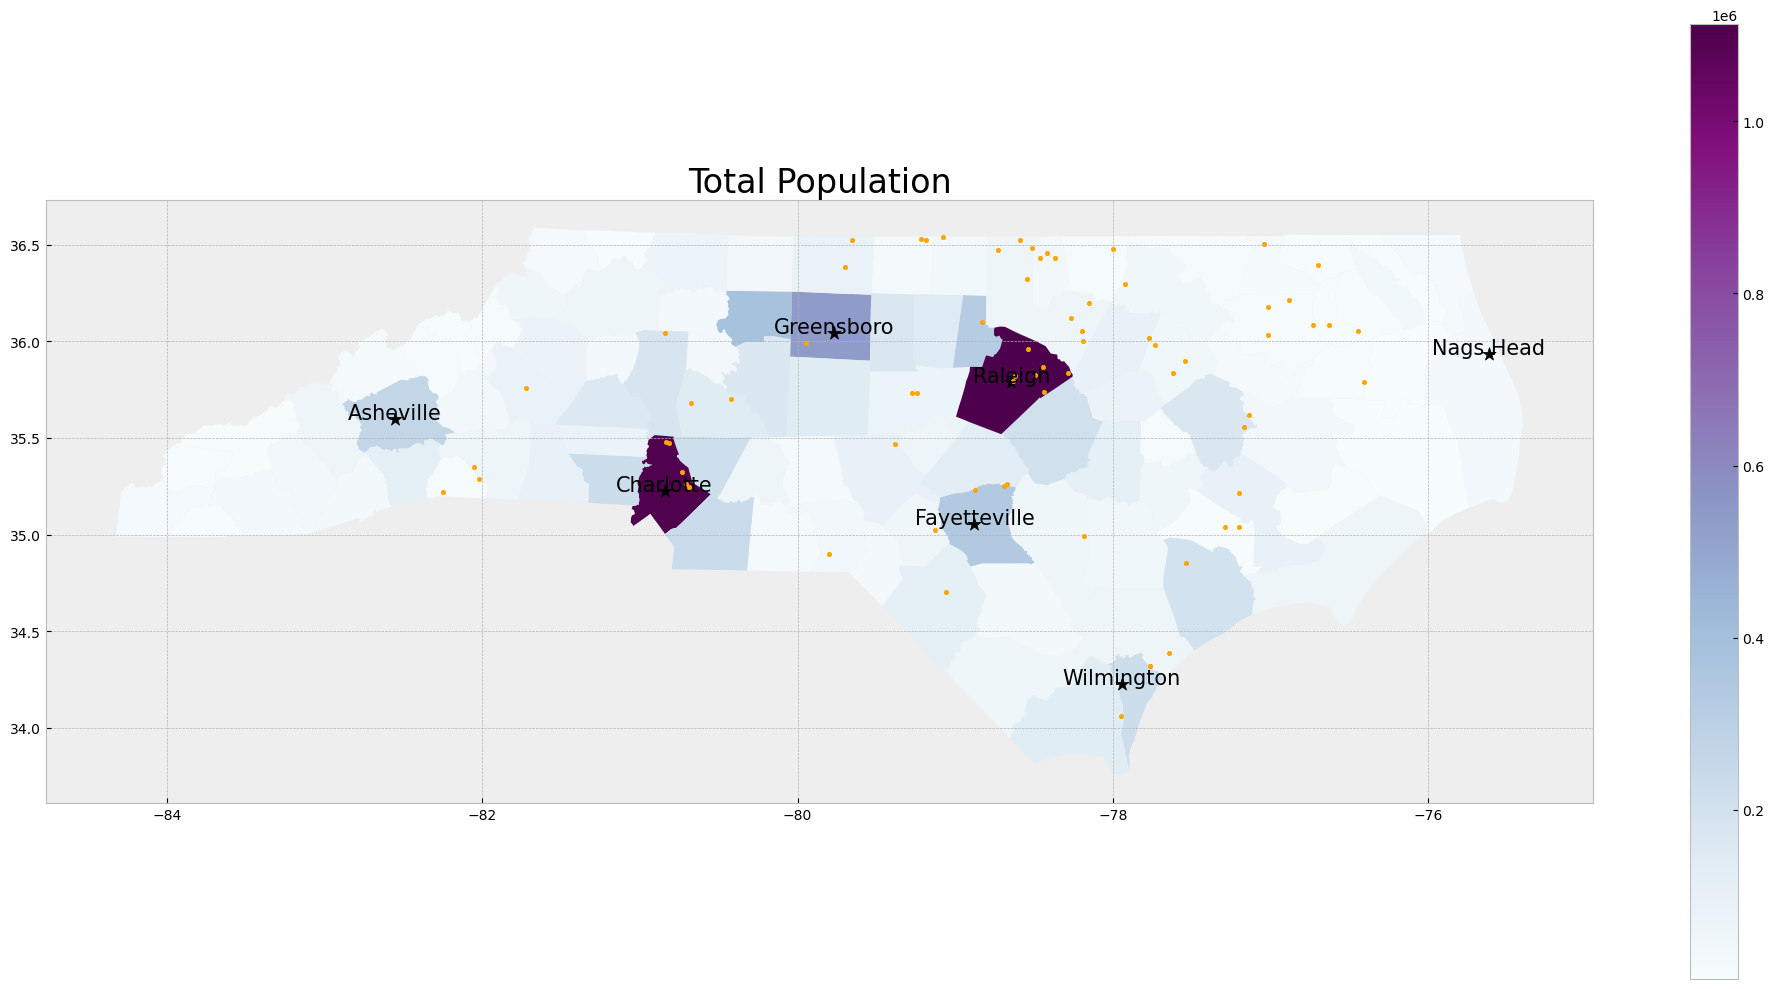

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "total_pop",
                       ax = ax,
                       cmap = "BuPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('Total Population', fontsize=24)

Text(0.5, 1.0, 'Black Population Proportion (%) by county')

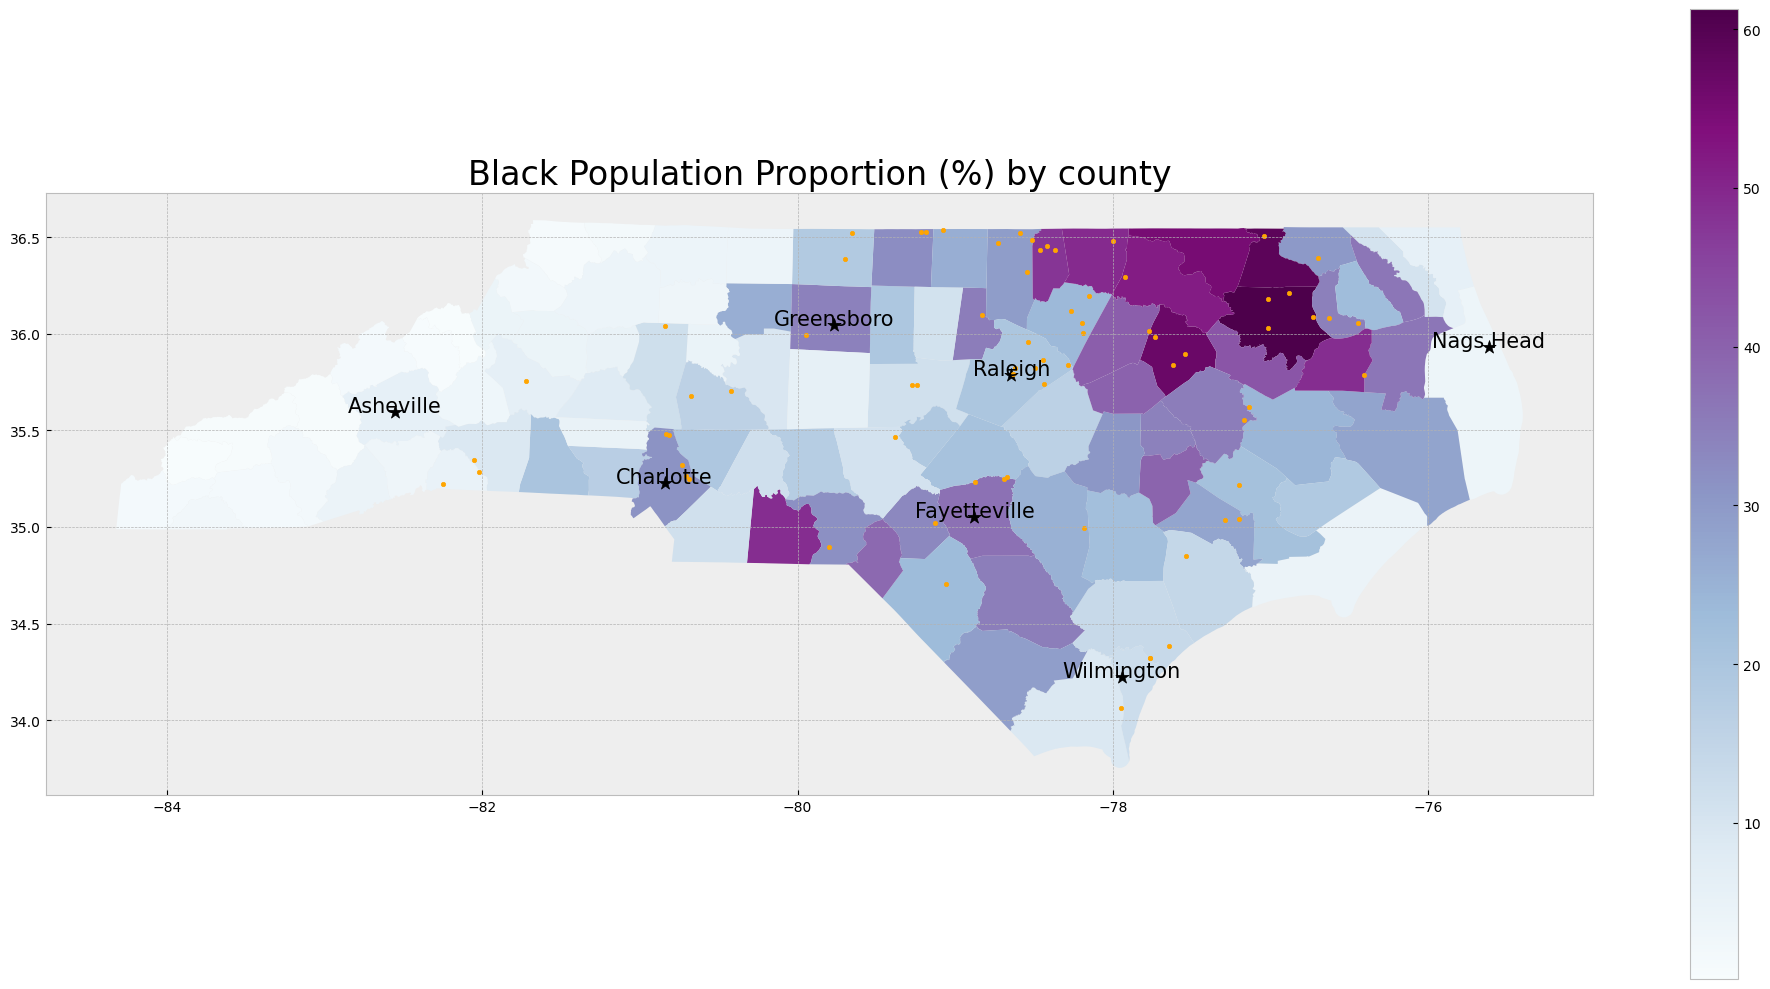

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge_county.plot(column = "county_black_proportion",
                       ax = ax,
                       cmap = "BuPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='orange', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('Black Population Proportion (%) by county', fontsize=24)

Text(0.5, 1.0, 'Black Population Proportion (%) by tract')

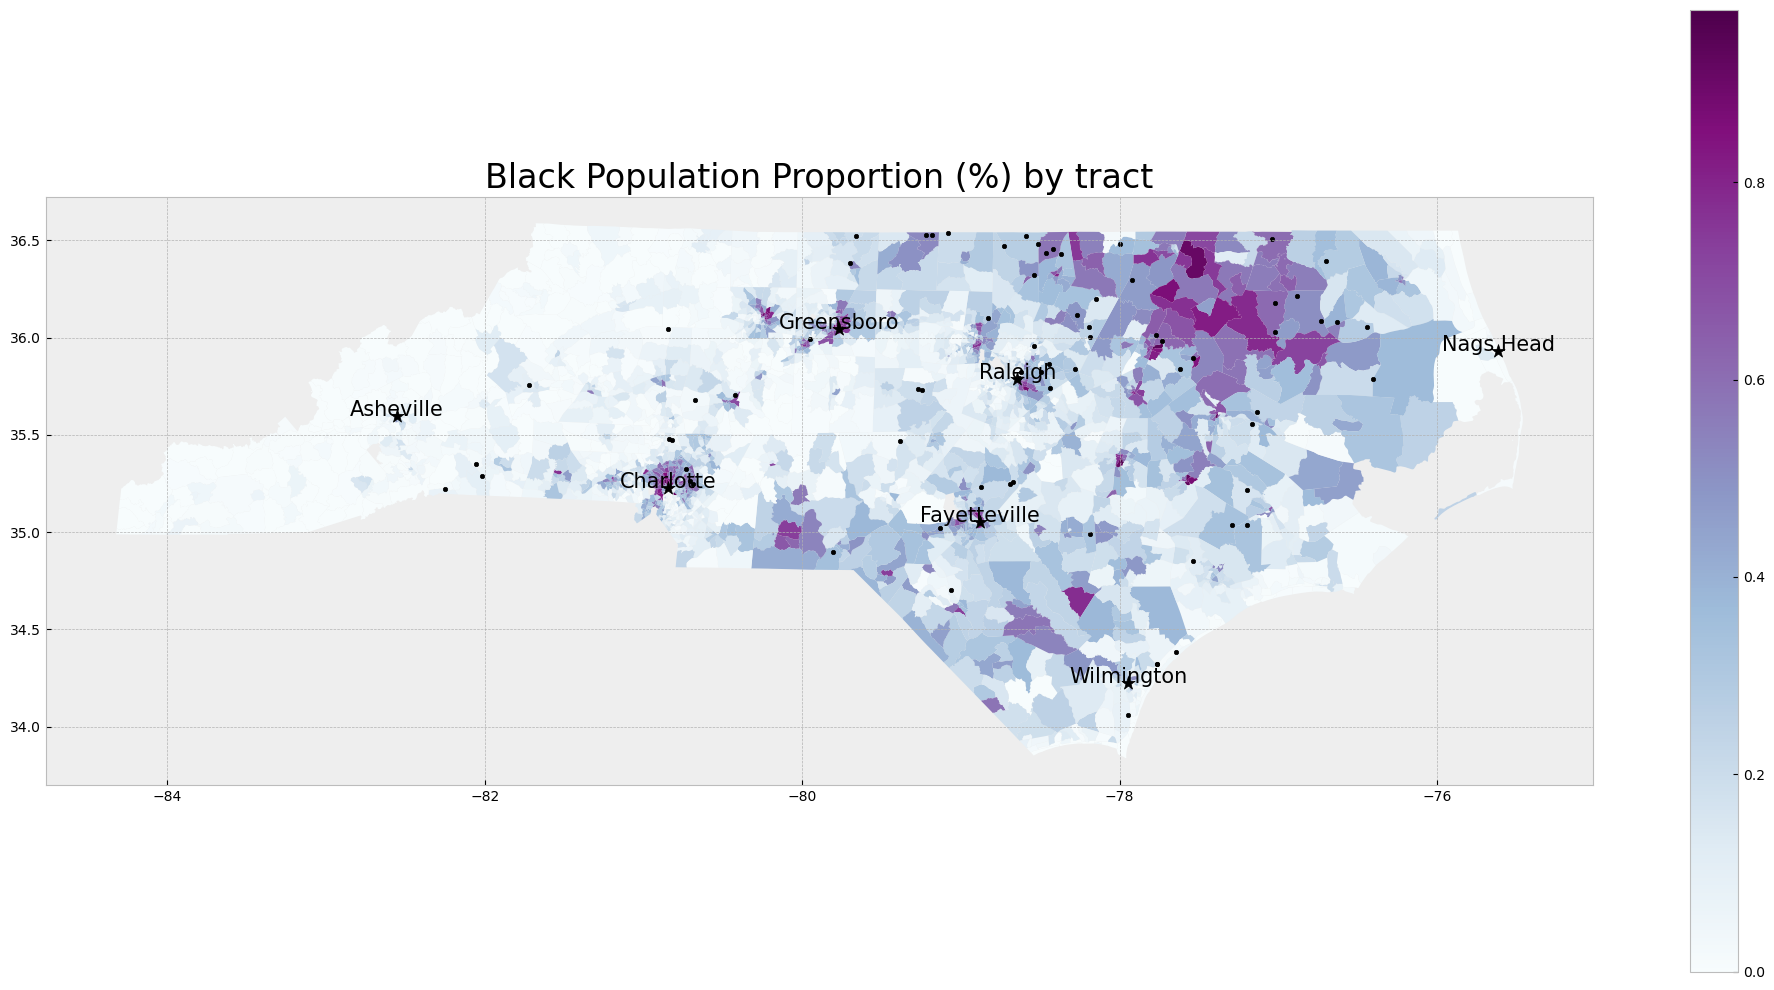

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
nc_merge["black_prop"] = nc_merge["black_pop"]/nc_merge["total_pop"]

nc_merge.plot(column = "black_prop",
                       ax = ax,
                       cmap = "BuPu",
                       legend = True)

gdf.plot(ax=ax, marker='*', color='black', markersize=100)
gdf.apply(lambda x: ax.annotate(text=x['City'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=15), axis=1)
plantation_df.plot(ax=ax, marker='o', color='black', markersize=10)

# Stylize plots
plt.style.use('bmh')
plt.tight_layout()
plt.title('Black Population Proportion (%) by tract', fontsize=24)

0 (27, 40)
['Anson' 'Bertie' 'Bladen' 'Caswell' 'Cleveland' 'Columbus' 'Cumberland'
 'Duplin' 'Edgecombe' 'Greene' 'Halifax' 'Hertford' 'Hoke' 'Jones'
 'Lenoir' 'Martin' 'Northampton' 'Perquimans' 'Richmond' 'Robeson'
 'Rockingham' 'Sampson' 'Scotland' 'Tyrrell' 'Vance' 'Warren' 'Washington']
[0. 4. 0. 2. 0. 0. 2. 1. 3. 0. 1. 1. 1. 2. 0. 0. 0. 0. 1. 1. 2. 0. 0. 0.
 3. 1. 1.]


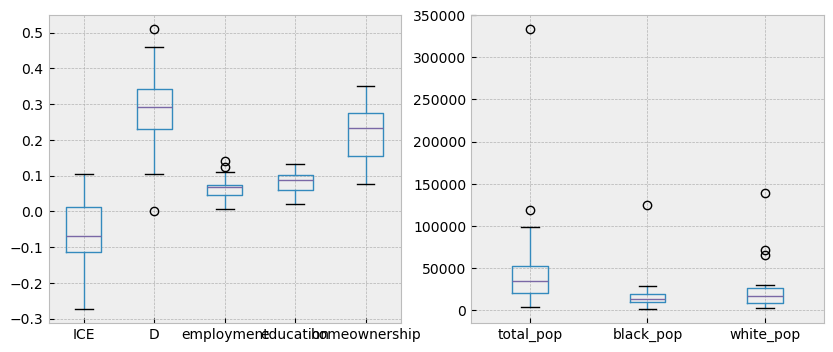

1 (61, 40)
['Alamance' 'Alexander' 'Avery' 'Beaufort' 'Brunswick' 'Buncombe' 'Burke'
 'Cabarrus' 'Caldwell' 'Camden' 'Carteret' 'Catawba' 'Chatham' 'Chowan'
 'Clay' 'Craven' 'Currituck' 'Dare' 'Davidson' 'Davie' 'Durham' 'Forsyth'
 'Franklin' 'Gaston' 'Granville' 'Guilford' 'Harnett' 'Haywood'
 'Henderson' 'Iredell' 'Jackson' 'Johnston' 'Lee' 'Lincoln' 'McDowell'
 'Madison' 'Mecklenburg' 'Montgomery' 'Moore' 'Nash' 'Hanover' 'Onslow'
 'Orange' 'Pamlico' 'Pasquotank' 'Pender' 'Person' 'Pitt' 'Polk'
 'Randolph' 'Rowan' 'Rutherford' 'Stanly' 'Stokes' 'Surry' 'Transylvania'
 'Union' 'Wake' 'Wayne' 'Wilson' 'Yadkin']
[0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 2. 2. 0. 1. 0. 0. 0. 0. 1. 0. 4. 0.
 4. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 5. 0. 1. 1. 0. 3. 0. 0. 0. 1. 1. 1.
 2. 0. 2. 1. 0. 0. 0. 0. 0. 7. 0. 0. 0.]


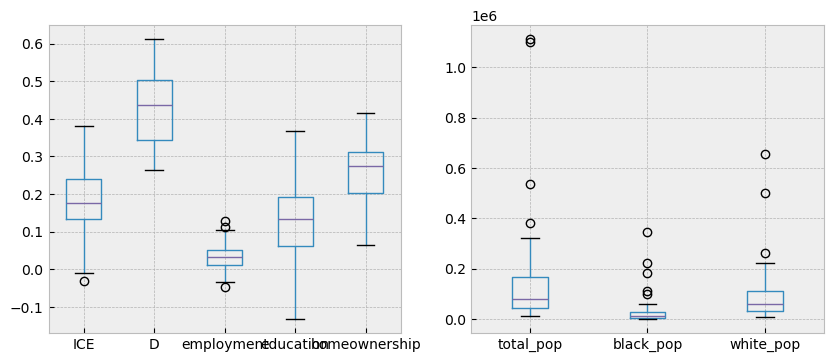

2 (12, 40)
['Alleghany' 'Ashe' 'Cherokee' 'Gates' 'Graham' 'Hyde' 'Macon' 'Mitchell'
 'Swain' 'Watauga' 'Wilkes' 'Yancey']
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


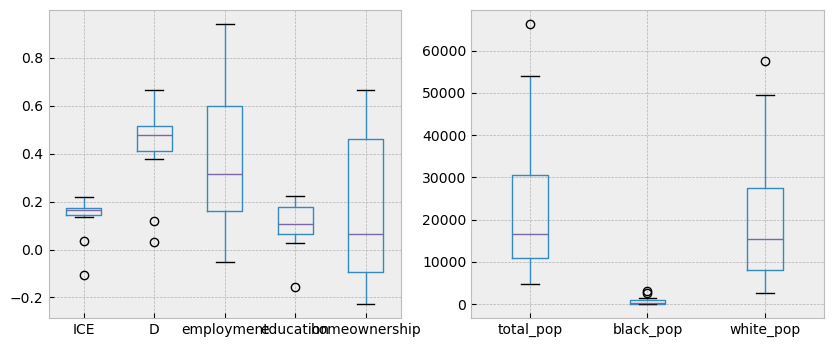

In [38]:
for cl, df in nc_merge_county.groupby("LCA"):
    print(cl, df.shape)
    print(df["NAME"].values)
    print(df["plantation"].values)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    df[["ICE", "D", "employment", "education", "homeownership"]].boxplot(ax=ax[0])
    df[["total_pop", "black_pop", "white_pop"]].boxplot(ax=ax[1])
    plt.show()